In [ ]:
pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 36.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    F

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow_decision_forests as tfdf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
#shape of dataframe

dataset.shape

(20640, 10)

In [ ]:
#check there are any NAN values

dataset.isnull().values.any()

True

In [ ]:
dataset.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(20433, 10)

In [ ]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df=dataset[(dataset['longitude']<-180)|(dataset['longitude']>180)|(dataset['latitude']<-90)|(dataset['latitude']>90)]
df.shape

(0, 10)

<Axes: >

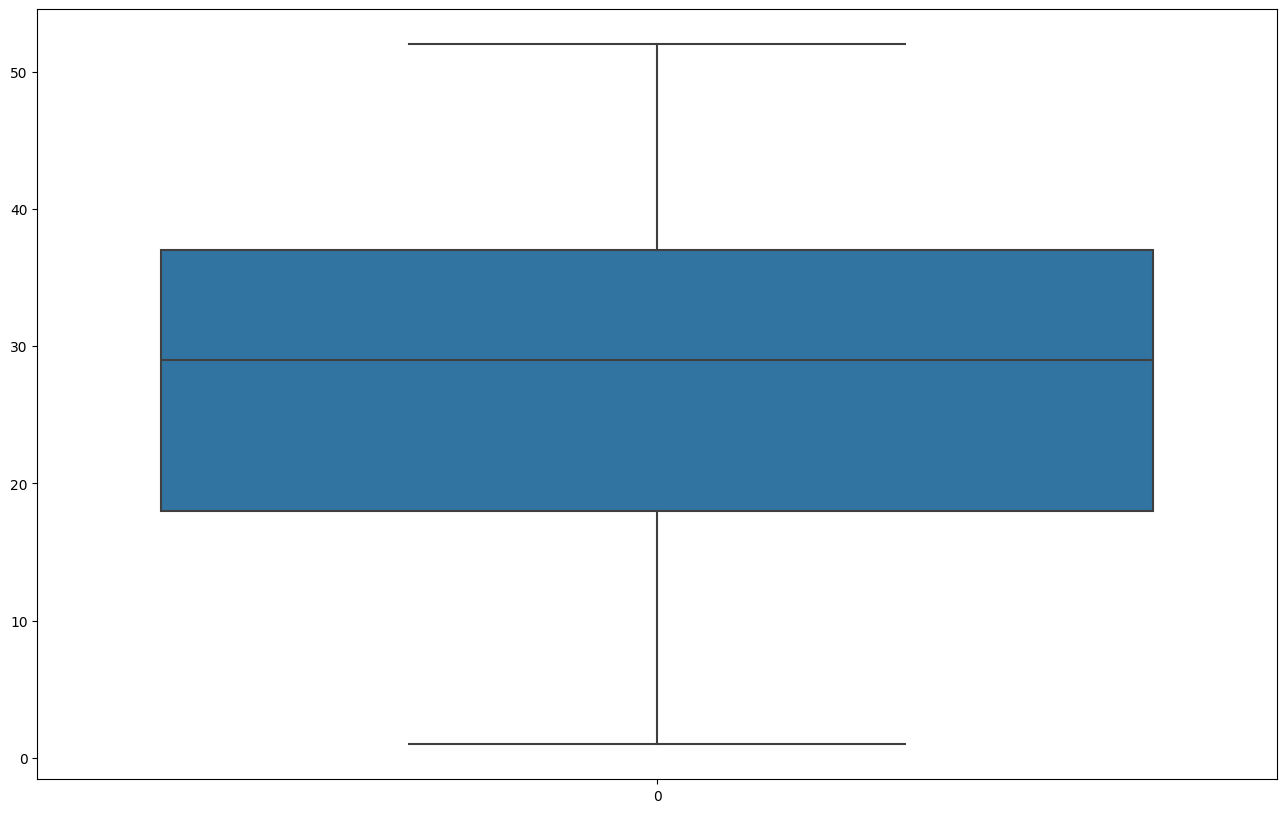

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(dataset['housing_median_age'])

<Axes: >

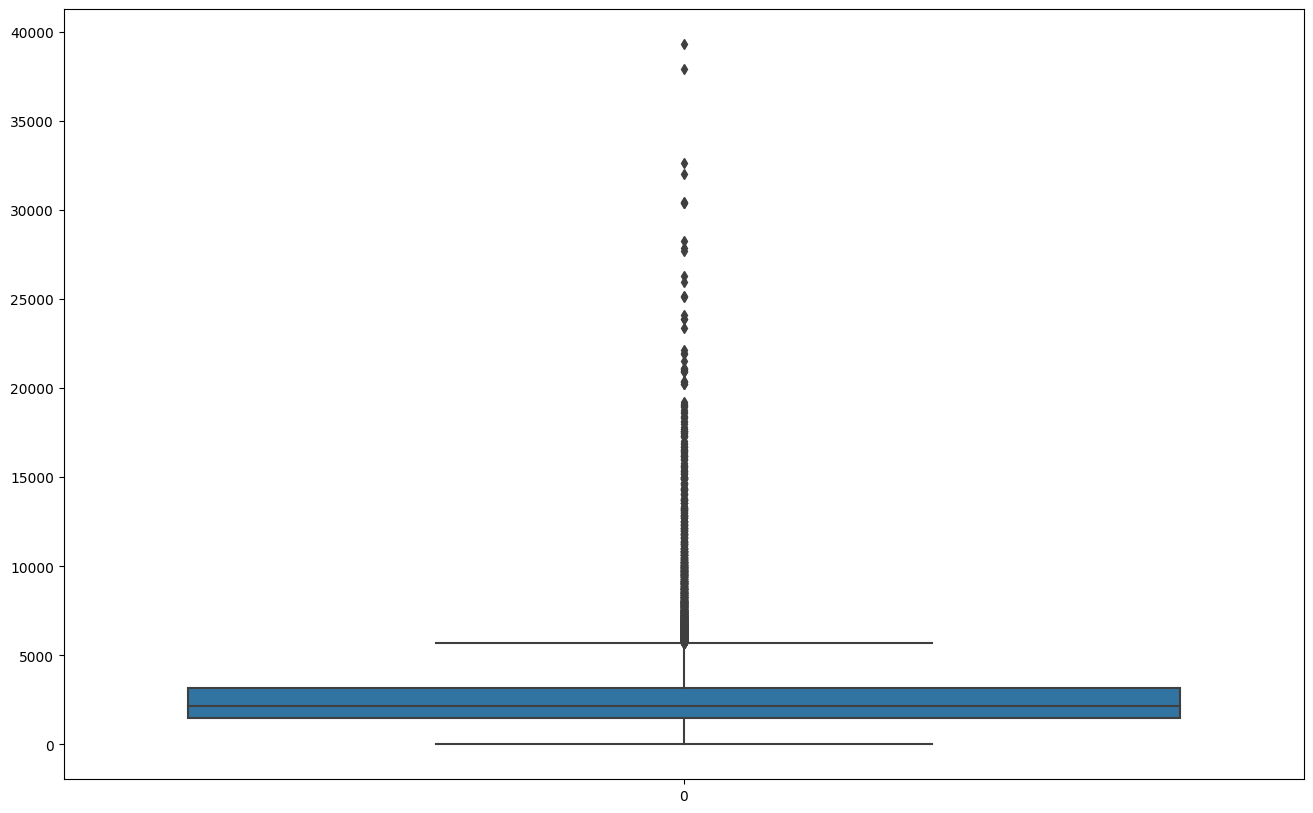

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(dataset['total_rooms'])

In [ ]:
df1=dataset[(dataset['total_rooms']>-5000)]
df1.shape

(20433, 10)

In [ ]:
min_threshold,max_threshold=dataset.total_rooms.quantile([0.001,0.999])

min_threshold,max_threshold

(24.432000000000002, 21739.75200000107)

In [ ]:
dataset[dataset.total_rooms<min_threshold]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
73,-122.29,37.81,46.0,12.0,4.0,18.0,7.0,0.4999,67500.0,NEAR BAY
3125,-117.76,35.22,4.0,18.0,3.0,8.0,6.0,1.6250,275000.0,INLAND
3126,-117.79,35.21,4.0,2.0,2.0,6.0,2.0,2.3750,137500.0,INLAND
4548,-118.21,34.02,52.0,22.0,7.0,55.0,7.0,7.5752,67500.0,<1H OCEAN
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0,<1H OCEAN
5628,-118.27,33.76,46.0,22.0,11.0,32.0,7.0,3.1250,112500.0,NEAR OCEAN
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN
6348,-117.75,34.06,52.0,24.0,6.0,46.0,7.0,1.6250,67500.0,INLAND
6542,-118.06,34.03,36.0,21.0,7.0,21.0,9.0,2.3750,175000.0,<1H OCEAN
7125,-118.04,33.90,36.0,15.0,5.0,15.0,6.0,0.4999,162500.0,<1H OCEAN


In [ ]:
dataset[dataset.total_rooms>max_threshold]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
922,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,<1H OCEAN
6057,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
6066,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
9018,-118.72,34.14,7.0,23866.0,4407.0,9873.0,4012.0,5.4032,318500.0,NEAR OCEAN
9019,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN
9040,-118.09,34.68,4.0,23386.0,4171.0,10493.0,3671.0,4.0211,144000.0,INLAND
9145,-118.46,34.40,12.0,25957.0,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN
9880,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN
10309,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN
12152,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,228900.0,<1H OCEAN


In [ ]:
dataset=dataset[dataset.total_rooms<max_threshold]
dataset.shape

(20412, 10)

In [ ]:
dataset=dataset[dataset.total_rooms>min_threshold]
dataset.shape

(20391, 10)

<Axes: >

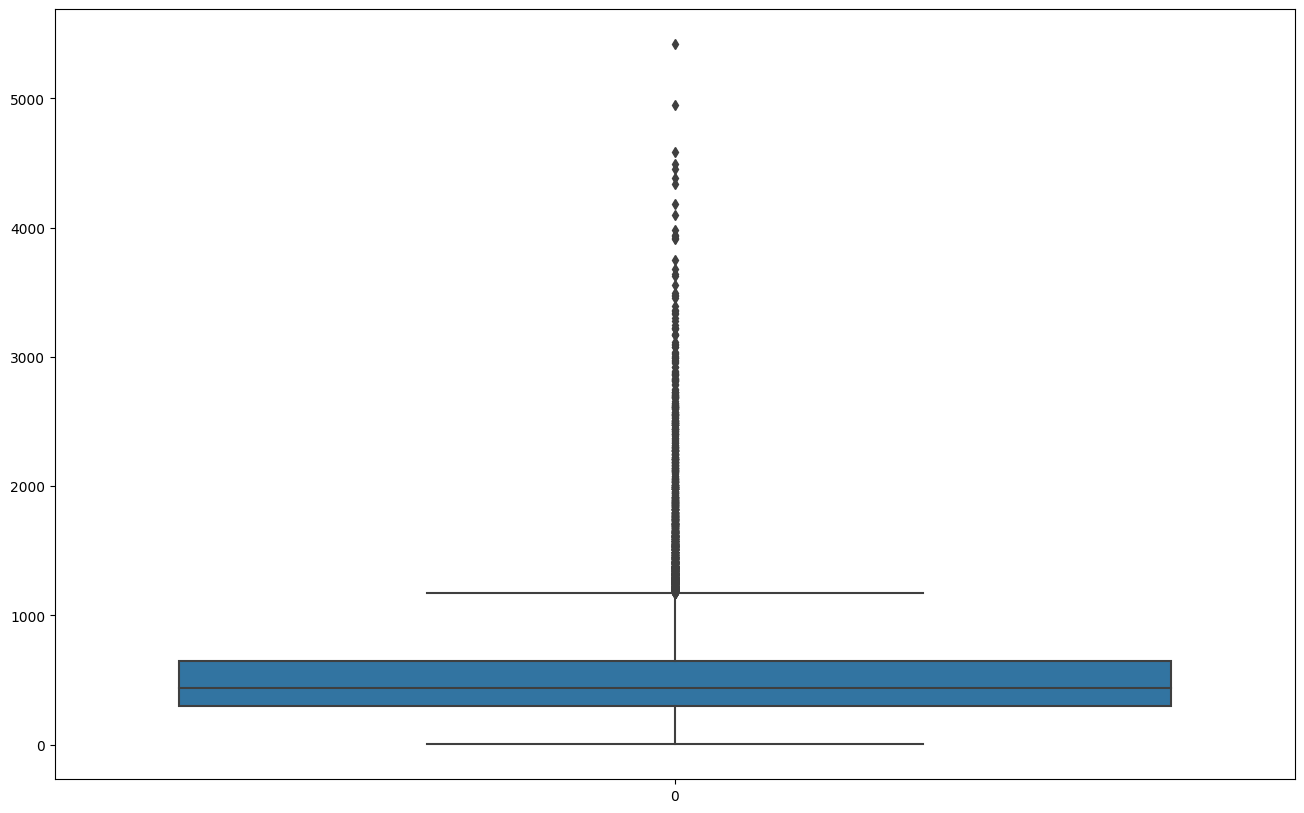

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(dataset['total_bedrooms'])

In [ ]:
min_threshold,max_threshold=dataset.total_bedrooms.quantile([0.001,0.999])

min_threshold,max_threshold

(8.0, 3477.050000000003)

In [ ]:
dataset=dataset[dataset.total_bedrooms<max_threshold]
dataset.shape

(20370, 10)

In [ ]:
dataset=dataset[dataset.total_bedrooms>min_threshold]
dataset.shape

(20348, 10)

<Axes: >

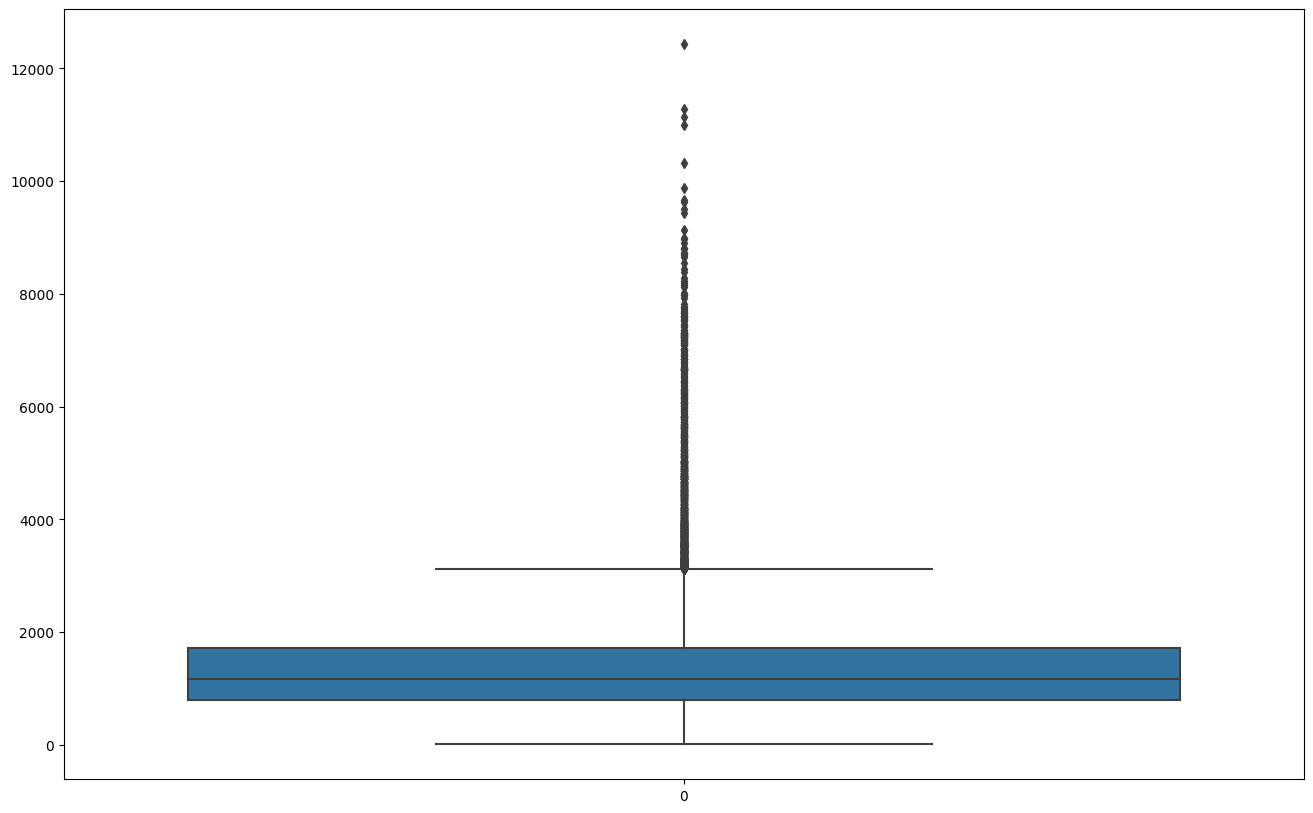

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(dataset['population'])

In [ ]:
# Dividing the dataset into independant and dependant variables
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'],data=dataset)
y=pd.DataFrame(columns=['median_house_value'],data=dataset)

In [ ]:
#Creating the dummy values for ocean_proximity

X = pd.get_dummies(data = X, columns = ['ocean_proximity'] , prefix = ['ocean_proximity'] , drop_first = True)

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,0,0,0


In [ ]:
#define the features and the labels, X and y
#X = dataset.drop(['median_house_value'], axis=1)
#y = dataset['median_house_value']

In [ ]:
#X

<Axes: >

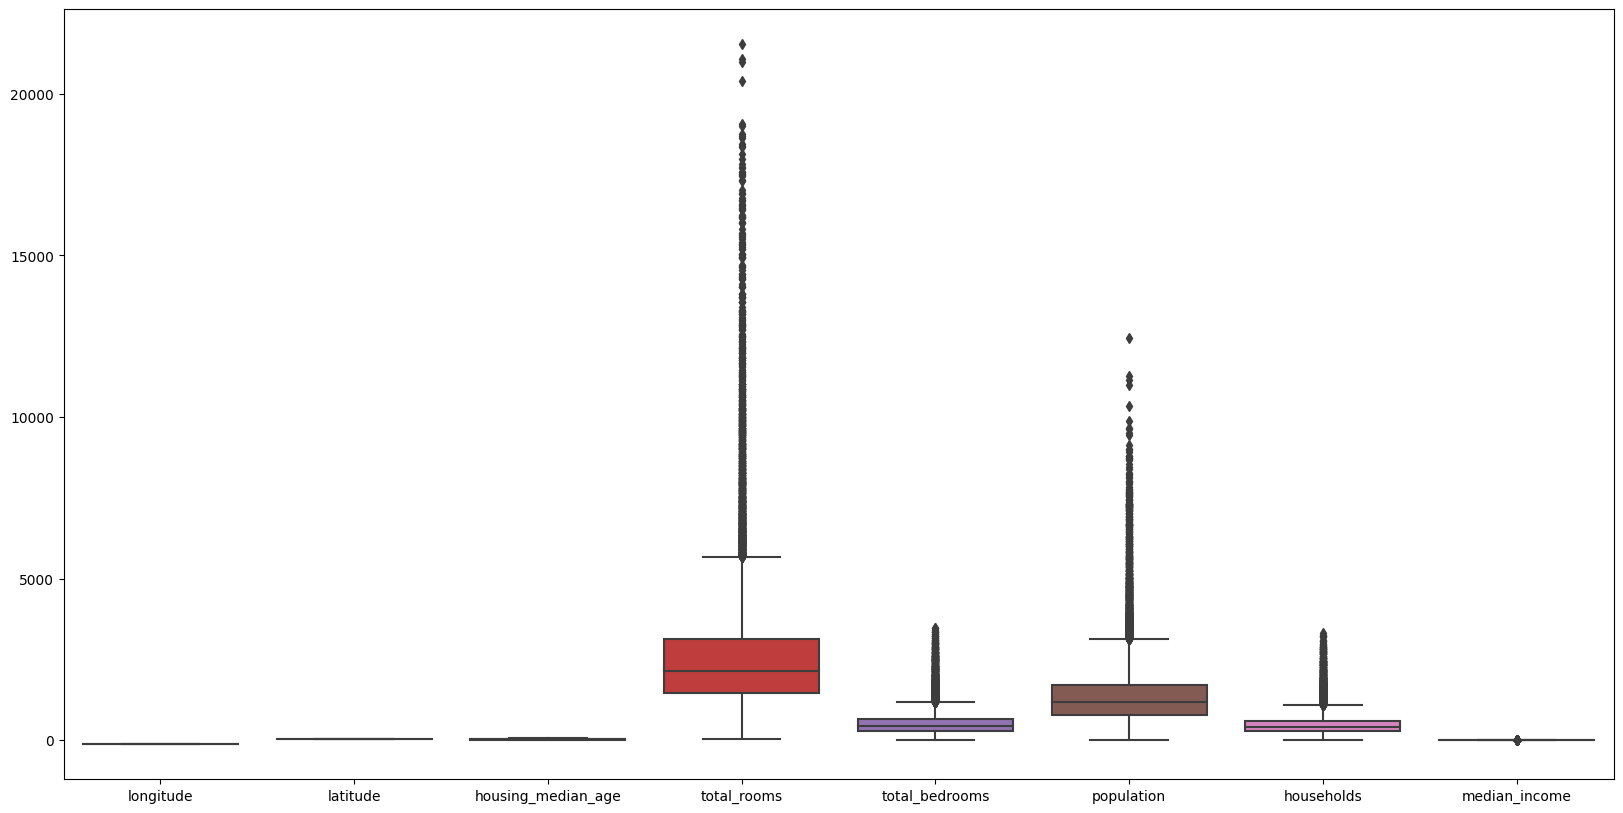

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(X.iloc[:,:8])

In [ ]:
y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


<Axes: >

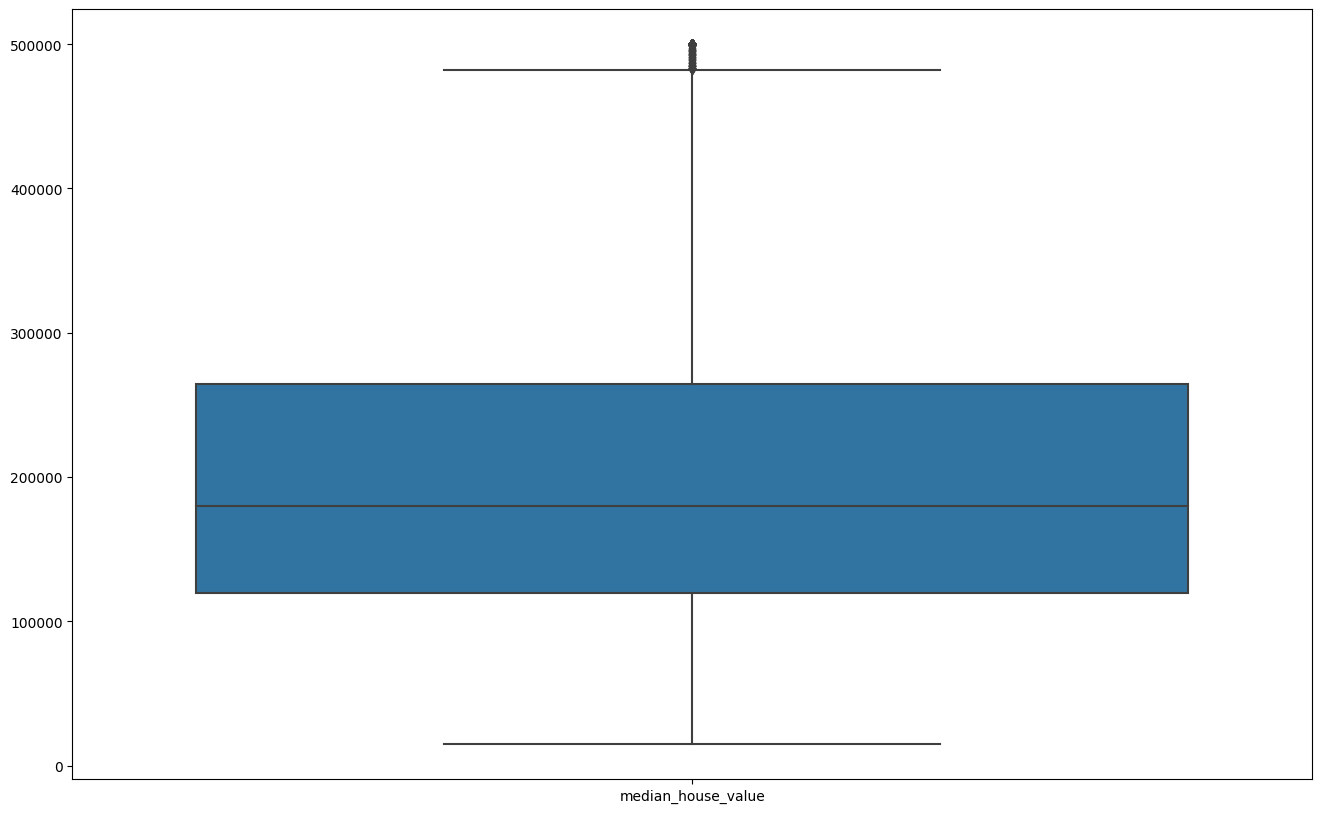

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(y)

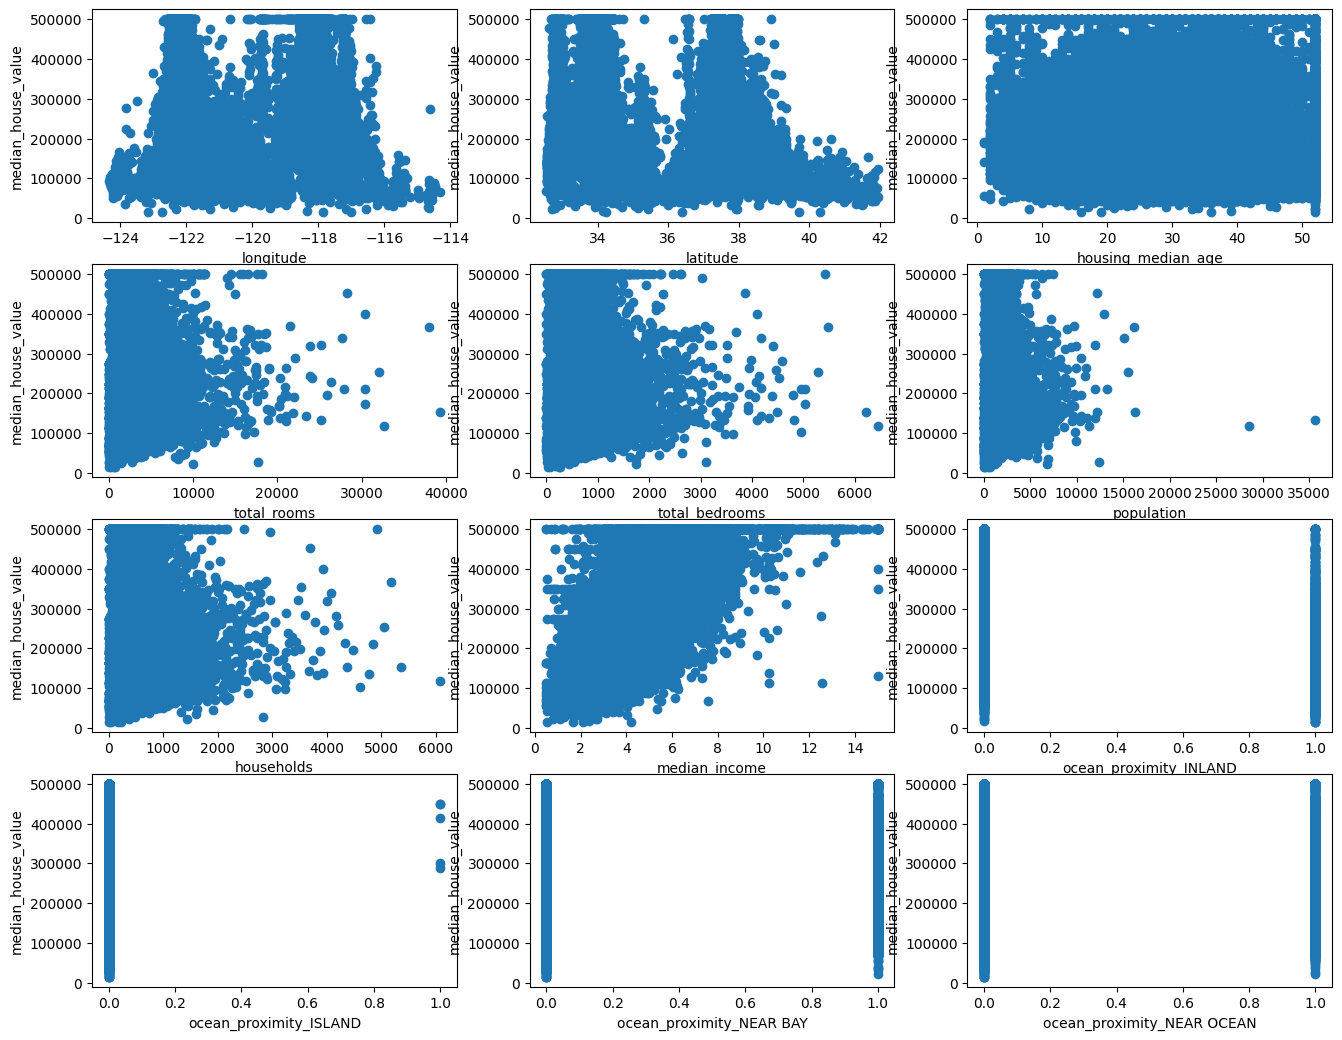

In [ ]:
# visiualize all variables  with median_house_priceprice)
from scipy import stats
#creates figure
plt.figure(figsize=(16, 16))

for i, col in enumerate(X.columns[:]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = X[col] #x-axis
    y = y #y-axis
    plt.xlabel(col)
    plt.ylabel('median_house_value')
    plt.plot(x, y, 'o')


In [ ]:
print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (20348, 12)
the shape of the targets y is: (20348, 1)


In [ ]:
type(y)

pandas.core.frame.DataFrame

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_ and y_.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=1)

# Split the 30% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
#del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (14243, 12)
the shape of the training set (target) is: (14243, 1)

the shape of the cross validation set (input) is: (3052, 12)
the shape of the cross validation set (target) is: (3052, 1)

the shape of the test set (input) is: (3053, 12)
the shape of the test set (target) is: (3053, 1)


In [ ]:
X_.shape

(6105, 12)

In [ ]:
y_train.shape

(14243, 1)

In [ ]:
#Feature Standardization

from sklearn.preprocessing import StandardScaler

# Initialize the class
scaler = StandardScaler()

# Compute the mean and standard deviation of the training set,cv set,test set then transform it
X_train = scaler.fit_transform(X_train)
X_cv = scaler.fit_transform(X_cv)
X_test = scaler.transform(X_test)
X_ = scaler.transform(X_)
y_train = scaler.fit_transform(y_train)
y_cv = scaler.fit_transform(y_cv)
y_test = scaler.transform(y_test)
y_ = scaler.transform(y_)

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
import time

In [ ]:
X_test_new=X_
y_test_new=y_

In [ ]:
X_train_array = np.asarray(X_train)
y_train_array   = np.asarray(y_train)
X_test_new_array = np.asarray(X_test_new)
y_test_new_array   = np.asarray(y_test_new)
print(X_train_array.shape)
print(y_train_array.shape)

(14243, 12)
(14243, 1)


In [ ]:
lm = LinearRegression()
t0 = time.time()
lm.fit(X_train, y_train)
print("Training time:", time.time()-t0)

Training time: 0.0352330207824707


In [ ]:
lm.coef_

array([[-0.49505903, -0.49692806,  0.12465658, -0.11091205,  0.39309659,
        -0.39241596,  0.15737981,  0.65248042, -0.14969656,  0.01169448,
        -0.02143742,  0.00837225]])

In [ ]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(X_train,y_train)

0.6569745165945786

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
mse = (mean_squared_error(y_train, y_train_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 0.34302548340542127
RMSE is 0.585683774237789
R2 score is 0.6569745165945786




In [ ]:
# model evaluation for testing set
y_test_predict = lm.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MSE is 0.3419723886634544
RMSE is 0.5847840530173976
R2 score is 0.6501081100651738


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 1.6251245040131936


# Guassian process Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# create the squared exponential (RBF) kernel
kernel = RBF()

# create the Gaussian process regressor with the RBF kernel
gp = GaussianProcessRegressor(kernel=kernel)


In [ ]:
t0 = time.time()
# fit the model to the data
gp.fit(X_train, y_train)

print("Training time:", time.time()-t0)

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training time: 419.96476912498474


In [ ]:
# model evaluation for testing set
y_test_predict = gp.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('SMAPE score is {}'.format(smape))

The model performance for testing set
--------------------------------------
MSE is 0.9774603814416383
RMSE is 0.9886659604950695
R2 score is -9.670820414986459e-05


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 1.0


Random forest

In [ ]:
# Configure the model.
model= tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION,verbose=2)
t0 = time.time()

# Train the model.
model.fit(X_train,y_train)
print("Training time:", time.time()-t0)

Use 2 thread(s) for training
Use /tmp/tmpq2zs_a2_ as temporary training directory
Reading training dataset...
Training tensor examples:
Features: Tensor("data:0", shape=(None, 12), dtype=float32)
Label: Tensor("data_1:0", shape=(None, 1), dtype=float32)
Weights: None
Normalized tensor features:
 {'data:0.0': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice:0' shape=(None,) dtype=float32>), 'data:0.1': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_1:0' shape=(None,) dtype=float32>), 'data:0.2': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_2:0' shape=(None,) dtype=float32>), 'data:0.3': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_3:0' shape=(None,) dtype=float32>), 'data:0.4': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_4:0' shape=(None,) dtype=float32>), 'data:0.5': SemanticTensor(semantic=<Semantic.NUMERICA

[INFO 23-08-14 00:47:32.5104 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-08-14 00:47:32.5105 UTC kernel.cc:774] Collect training examples
[INFO 23-08-14 00:47:32.5106 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-08-14 00:47:32.5113 UTC kernel.cc:393] Number of batches: 446
[INFO 23-08-14 00:47:32.5113 UTC kernel.cc:394] Number of examples: 14243
[INFO 23-08-14 00:47:32.5132 UTC kernel.cc:794] Training dataset:
Number of records: 14243
Number of columns: 13

Number of columns by type:
	NUMERICAL: 13 (100%)

Columns:

NUMERICAL: 13 (100%)
	0: "__LABEL" NUMERICAL mean:4.9933e-09 min:-1.66746 max:2.53579 sd:1
	1: "data:0.0" NUMERICAL mean:-4.04393e-10 min:-2.37856 max:2.62545 sd:1
	2: "data:0.1" N

Model trained in 0:00:14.847381
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.
Training time: 22.28740906715393


In [ ]:
# Evaluate the model on the test dataset.
model.compile(metrics=["mse"])
evaluation = model.evaluate(X_,y_, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

191/191 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - mse: 0.1940
{'loss': 0.0, 'mse': 0.19402165710926056}

MSE: 0.19402165710926056
RMSE: 0.4404788951916545


In [ ]:
# model evaluation for testing set
y_test_predict = model.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#mape=mape(y_, y_test_predict)
#smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('SMAPE score is {}'.format(smape))

191/191 [==============================] - 1s 5ms/step
The model performance for testing set
--------------------------------------
MSE is 0.19402163480977502
RMSE is 0.4404788698788797
R2 score is 0.801485152771658


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 1.2438644244078394


XGBOOST

In [ ]:
model_2 = tfdf.keras.GradientBoostedTreesModel(task = tfdf.keras.Task.REGRESSION,verbose=2)

Use 2 thread(s) for training
Use /tmp/tmp8afh_ts3 as temporary training directory


In [ ]:
t0=time.time()
model_2.fit(X_train,y_train)
print("Training time:", time.time()-t0)



Reading training dataset...
Training tensor examples:
Features: Tensor("data:0", shape=(None, 12), dtype=float32)
Label: Tensor("data_1:0", shape=(None, 1), dtype=float32)
Weights: None
Normalized tensor features:
 {'data:0.0': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice:0' shape=(None,) dtype=float32>), 'data:0.1': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_1:0' shape=(None,) dtype=float32>), 'data:0.2': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_2:0' shape=(None,) dtype=float32>), 'data:0.3': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_3:0' shape=(None,) dtype=float32>), 'data:0.4': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_4:0' shape=(None,) dtype=float32>), 'data:0.5': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_5:0' shape=(None,) dtype=float32>), 'data:

[INFO 23-08-14 00:47:53.0306 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-08-14 00:47:53.0307 UTC kernel.cc:774] Collect training examples
[INFO 23-08-14 00:47:53.0307 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: NUMERICAL
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-08-14 00:47:53.0308 UTC kernel.cc:393] Number of batches: 446
[INFO 23-08-14 00:47:53.0308 UTC kernel.cc:394] Number of examples: 14243
[INFO 23-08-14 00:47:53.0321 UTC kernel.cc:794] Training dataset:
Number of records: 14243
Number of columns: 13

Number of columns by type:
	NUMERICAL: 13 (100%)

Columns:

NUMERICAL: 13 (100%)
	0: "__LABEL" NUMERICAL mean:4.9933e-09 min:-1.66746 max:2.53579 sd:1
	1: "data:0.0" NUMERICAL mean:-4.04393e-10 min:-2.37856 max:2.62545 sd:1
	2: "data:0.1" N

Model trained in 0:00:09.746998
Compiling model...
Model compiled.
Training time: 10.283218383789062


In [ ]:
print(model_2.summary())

Model: "gradient_boosted_trees_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: REGRESSION
Label: "__LABEL"

Input Features (12):
	data:0.0
	data:0.1
	data:0.10
	data:0.11
	data:0.2
	data:0.3
	data:0.4
	data:0.5
	data:0.6
	data:0.7
	data:0.8
	data:0.9

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.  "data:0.7"  0.278003 ################
    2.  "data:0.1"  0.253985 ############
    3.  "data:0.0"  0.246414 ###########
    4.  "data:0.5"  0.224937 #######
    5.  "data:0.3"  0.222349 #######
    6.  "data:0.2"  0.207937 #####
    7.  "data:0.4"  0.195158 ###
    8.  "data:0.6"  0.188022 ##
    9.  "data:0.8"  0.185096 #
   10. "data:0.11"  0.175802 
   11. "data:0.10"  0.175009 

Variable I

In [ ]:
# Evaluate the model on the test dataset.
model_2.compile(metrics=["mse"])
evaluation = model_2.evaluate(X_,y_, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

191/191 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mse: 0.1823
{'loss': 0.0, 'mse': 0.18225203454494476}

MSE: 0.18225203454494476
RMSE: 0.4269098670034985


In [ ]:
# model evaluation for testing set
y_test_predict = model_2.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#mape=mape(y_, y_test_predict)
#smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
#print('SMAPE score is {}'.format(smape))

191/191 [==============================] - 0s 1ms/step
The model performance for testing set
--------------------------------------
MSE is 0.18225194343607942
RMSE is 0.4269097602961069
R2 score is 0.8135274102614718


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 1.2714180828911776


neural network


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model = Sequential()

model.add(Dense(150, activation='relu',input_shape=(n_cols,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1950      
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 92701 (362.11 KB)
Trainable params: 92701 

In [ ]:
X_train = np.asarray(X_train)
y_train   = np.asarray(y_train)
print(X_train.shape)
print(y_train.shape)

(14243, 12)
(14243, 1)


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 2s 3ms/step - loss: 0.3484 - mae: 0.4096 - val_loss: 0.3117 - val_mae: 0.4069
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2640 - mae: 0.3578 - val_loss: 0.2423 - val_mae: 0.3526
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2403 - mae: 0.3413 - val_loss: 0.2368 - val_mae: 0.3396
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2318 - mae: 0.3342 - val_loss: 0.2292 - val_mae: 0.3299
Epoch 5/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2243 - mae: 0.3273 - val_loss: 0.2395 - val_mae: 0.3345
Epoch 6/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2221 - mae: 0.3268 - val_loss: 0.2222 - val_mae: 0.3202
Epoch 7/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2156 - mae: 0.3197 - val_loss: 0.2193 - val_mae: 0.3282
Epoch 8/300
446/446 [==============================] - 1s 3ms/step - 

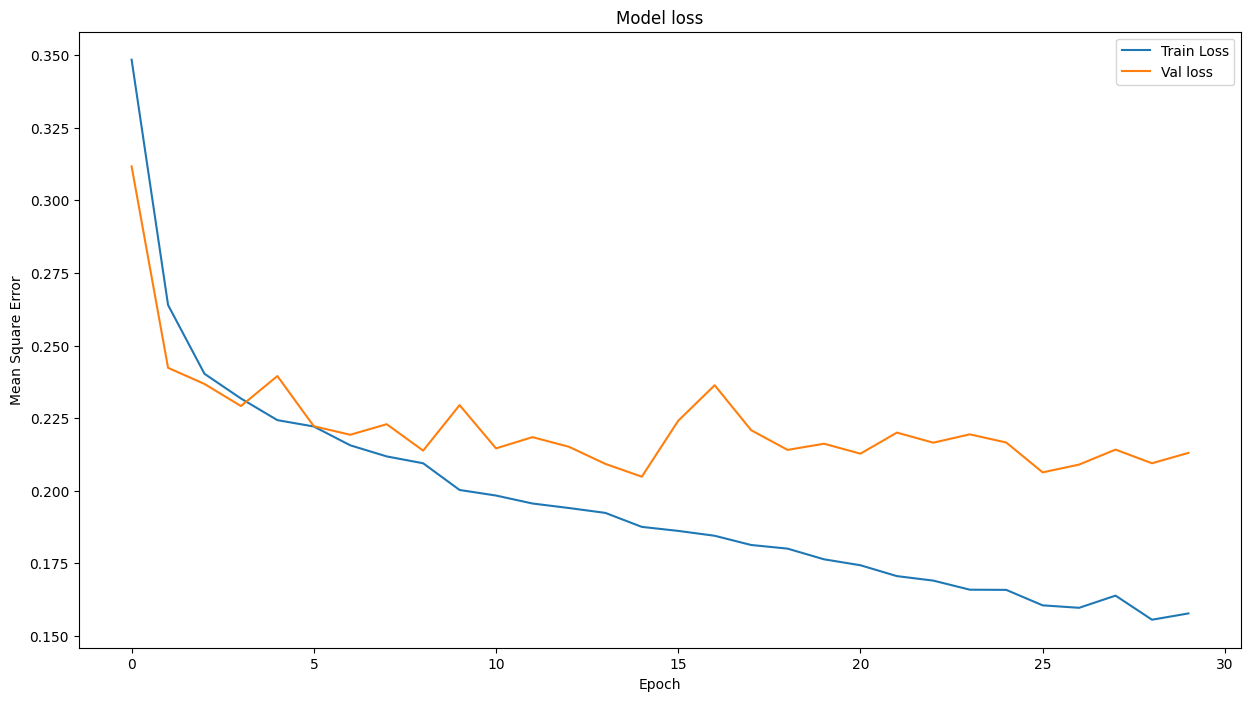

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 1s 1ms/step - loss: 0.1506 - mae: 0.2611
Mean square error:  0.1506081223487854
Root Mean square error:  0.38808262309563074
Mean absolute error:  0.2611408829689026


In [ ]:
#check the model performace in test dataset
score = model.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 1ms/step - loss: 0.2009 - mae: 0.2914
Mean square error:  0.20088495314121246
Root Mean square error:  0.4482019111307006
Mean absolute error:  0.2913571000099182


model1

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model1 = Sequential()

model1.add(Dense(11, activation='relu',input_shape=(n_cols,)))

model1.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model1.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                143       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model1.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 1s 2ms/step - loss: 0.6078 - mae: 0.5782 - val_loss: 0.3835 - val_mae: 0.4556
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3493 - mae: 0.4272 - val_loss: 0.3298 - val_mae: 0.4172
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3176 - mae: 0.4045 - val_loss: 0.3141 - val_mae: 0.4024
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3072 - mae: 0.3957 - val_loss: 0.3087 - val_mae: 0.4000
Epoch 5/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2995 - mae: 0.3899 - val_loss: 0.3002 - val_mae: 0.3915
Epoch 6/300
446/446 [==============================] - 1s 1ms/step - loss: 0.2947 - mae: 0.3851 - val_loss: 0.2948 - val_mae: 0.3901
Epoch 7/300
446/446 [==============================] - 1s 1ms/step - loss: 0.2903 - mae: 0.3821 - val_loss: 0.2902 - val_mae: 0.3851
Epoch 8/300
446/446 [==============================] - 1s 2ms/step - 

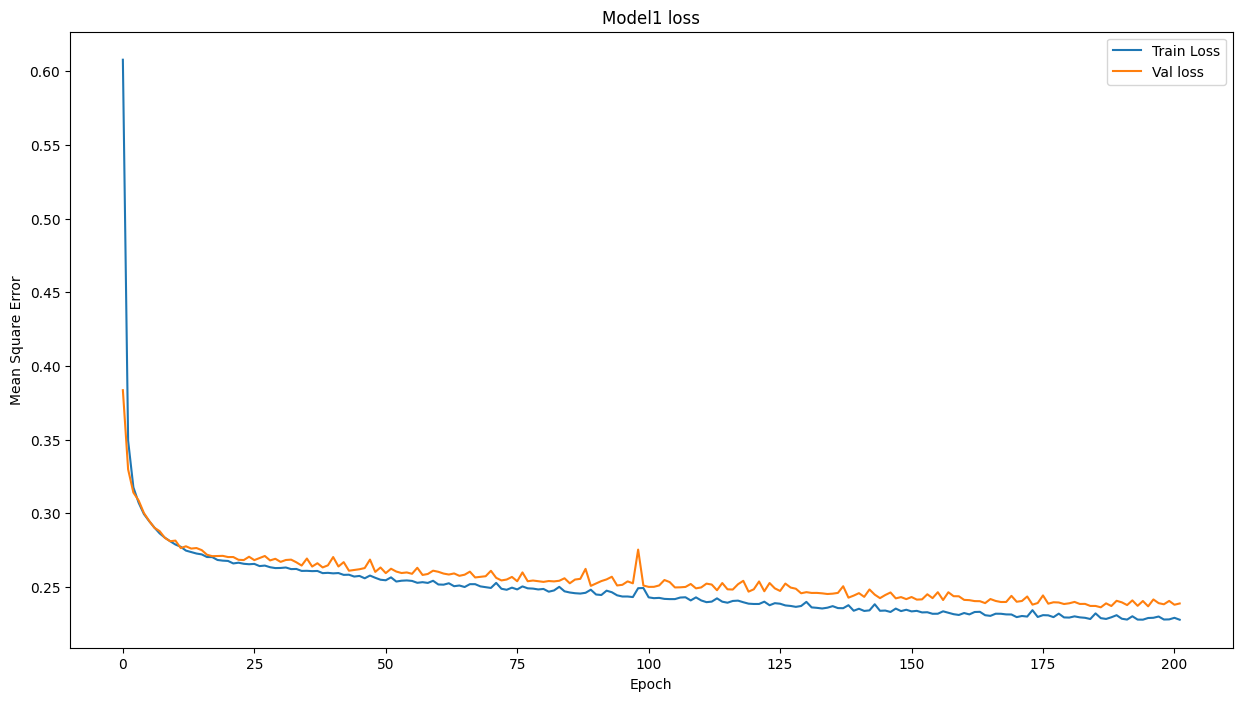

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model1 loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model1.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 1s 1ms/step - loss: 0.2261 - mae: 0.3257
Mean square error:  0.2260666936635971
Root Mean square error:  0.4754647133737656
Mean absolute error:  0.3256865441799164


In [ ]:
#check the model performace in test dataset
score = model1.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 978us/step - loss: 0.2395 - mae: 0.3289
Mean square error:  0.23949159681797028
Root Mean square error:  0.4893787866448343
Mean absolute error:  0.328949898481369


model2

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model2 = Sequential()

model2.add(Dense(20, activation='relu',input_shape=(n_cols,)))

model2.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model2.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                260       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model2.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 1s 2ms/step - loss: 0.4647 - mae: 0.4910 - val_loss: 0.3303 - val_mae: 0.4109
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3208 - mae: 0.4063 - val_loss: 0.3094 - val_mae: 0.4023
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3033 - mae: 0.3927 - val_loss: 0.3049 - val_mae: 0.3960
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2935 - mae: 0.3847 - val_loss: 0.2883 - val_mae: 0.3841
Epoch 5/300
446/446 [==============================] - 1s 1ms/step - loss: 0.2859 - mae: 0.3787 - val_loss: 0.2842 - val_mae: 0.3721
Epoch 6/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2817 - mae: 0.3744 - val_loss: 0.2795 - val_mae: 0.3758
Epoch 7/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2771 - mae: 0.3721 - val_loss: 0.2787 - val_mae: 0.3760
Epoch 8/300
446/446 [==============================] - 1s 2ms/step - 

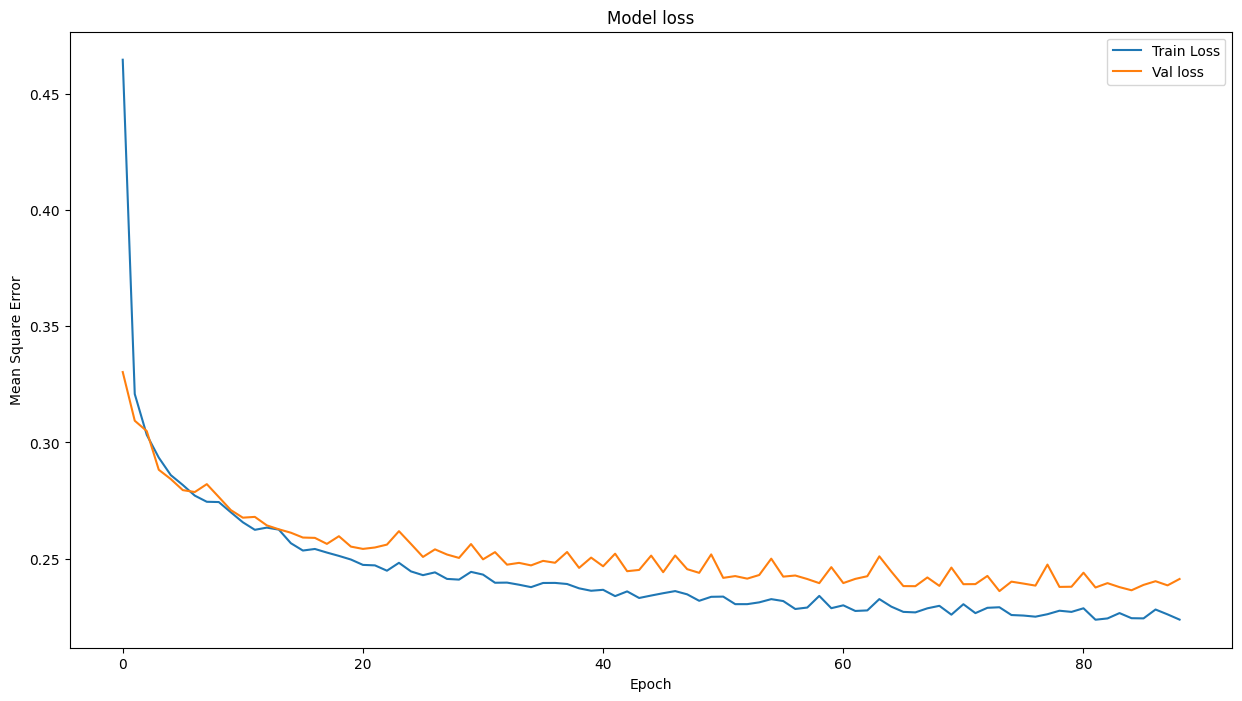

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model2.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 0s 1ms/step - loss: 0.2256 - mae: 0.3380
Mean square error:  0.2255900353193283
Root Mean square error:  0.47496319364696915
Mean absolute error:  0.33799901604652405


In [ ]:
#check the model performace in test dataset
score = model2.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 1ms/step - loss: 0.2402 - mae: 0.3478
Mean square error:  0.24018901586532593
Root Mean square error:  0.4900908240982746
Mean absolute error:  0.34779515862464905


model3

Best Neural Network model wrt MAPE value compare to all other model

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model3 = Sequential()

model3.add(Dense(345, activation='relu',input_shape=(n_cols,)))
model3.add(Dense(69, activation='relu'))

model3.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model3.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 345)               4485      
                                                                 
 dense_11 (Dense)            (None, 69)                23874     
                                                                 
 dense_12 (Dense)            (None, 1)                 70        
                                                                 
Total params: 28429 (111.05 KB)
Trainable params: 28429 (111.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model3.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3392 - mae: 0.3979 - val_loss: 0.3178 - val_mae: 0.3756
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2758 - mae: 0.3582 - val_loss: 0.2541 - val_mae: 0.3540
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2432 - mae: 0.3415 - val_loss: 0.2402 - val_mae: 0.3505
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2377 - mae: 0.3378 - val_loss: 0.2392 - val_mae: 0.3293
Epoch 5/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2301 - mae: 0.3298 - val_loss: 0.2487 - val_mae: 0.3563
Epoch 6/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2243 - mae: 0.3263 - val_loss: 0.2399 - val_mae: 0.3410
Epoch 7/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2198 - mae: 0.3210 - val_loss: 0.2267 - val_mae: 0.3196
Epoch 8/300
446/446 [==============================] - 1s 2ms/step - 

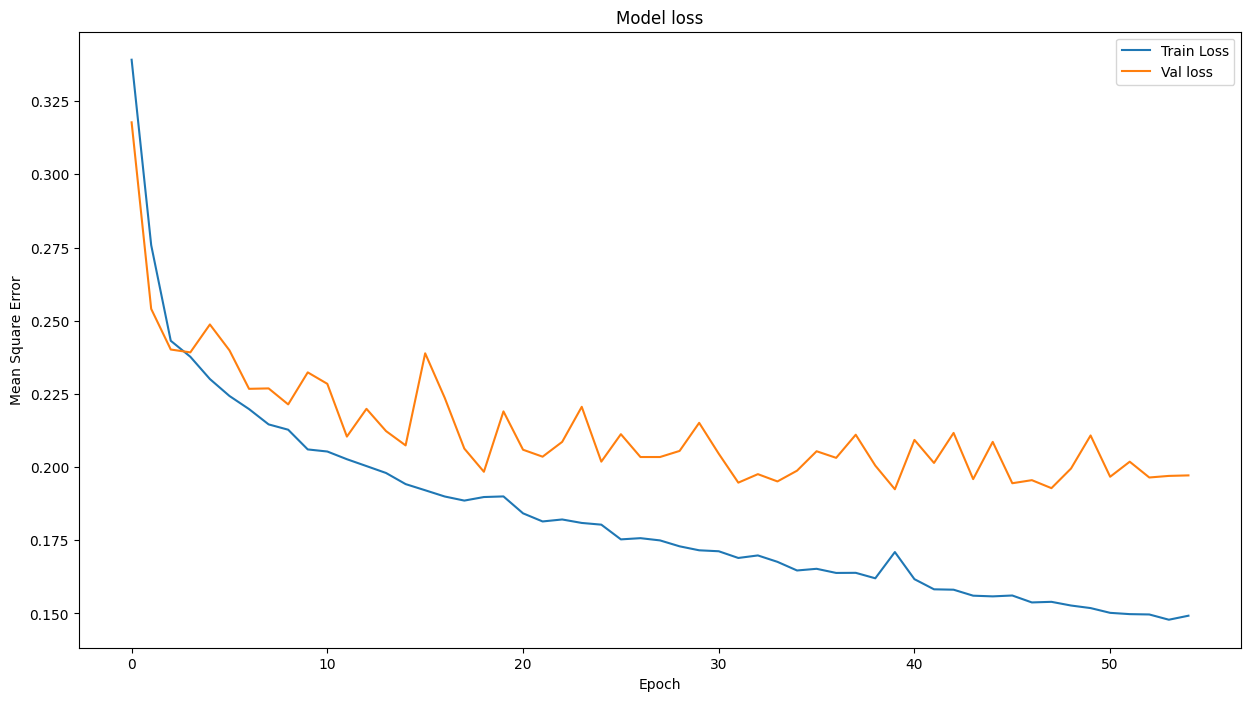

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model3.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 1s 1ms/step - loss: 0.1379 - mae: 0.2545
Mean square error:  0.137875035405159
Root Mean square error:  0.3713152776350025
Mean absolute error:  0.2545385956764221


In [ ]:
#check the model performace in test dataset
score = model3.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 1ms/step - loss: 0.1933 - mae: 0.2918
Mean square error:  0.19333209097385406
Root Mean square error:  0.4396954525280584
Mean absolute error:  0.29183244705200195


In [ ]:
# model evaluation for testing set
y_test_predict = model3.predict(X_)
mse = (mean_squared_error(y_, y_test_predict))
rmse=  np.sqrt(mse)
r2 = r2_score(y_, y_test_predict)
#mape=mape(y_, y_test_predict)
#smape=calculate_smape(y_, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

191/191 [==============================] - 0s 1ms/step
The model performance for testing set
--------------------------------------
MSE is 0.19525102980047807
RMSE is 0.4418721871768782
R2 score is 0.8002272870753815


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_,y_test_predict)
print('MAPE score is {}'.format(mape))

MAPE score is 1.2682748210342878


model4

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model4 = Sequential()

model4.add(Dense(16, activation='relu',input_shape=(n_cols,)))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(2, activation='relu'))



model4.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model4.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                208       
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 4)                 36        
                                                                 
 dense_16 (Dense)            (None, 2)                 10        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 393 (1.54 KB)
Trainable params: 393 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model4.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 2s 2ms/step - loss: 0.7177 - mae: 0.5946 - val_loss: 0.5949 - val_mae: 0.5209
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.5208 - mae: 0.4928 - val_loss: 0.4647 - val_mae: 0.4613
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.4268 - mae: 0.4502 - val_loss: 0.3942 - val_mae: 0.4332
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3703 - mae: 0.4243 - val_loss: 0.3524 - val_mae: 0.4210
Epoch 5/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3324 - mae: 0.4041 - val_loss: 0.3231 - val_mae: 0.4030
Epoch 6/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3063 - mae: 0.3898 - val_loss: 0.2976 - val_mae: 0.3809
Epoch 7/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2878 - mae: 0.3781 - val_loss: 0.2803 - val_mae: 0.3780
Epoch 8/300
446/446 [==============================] - 1s 2ms/step - 

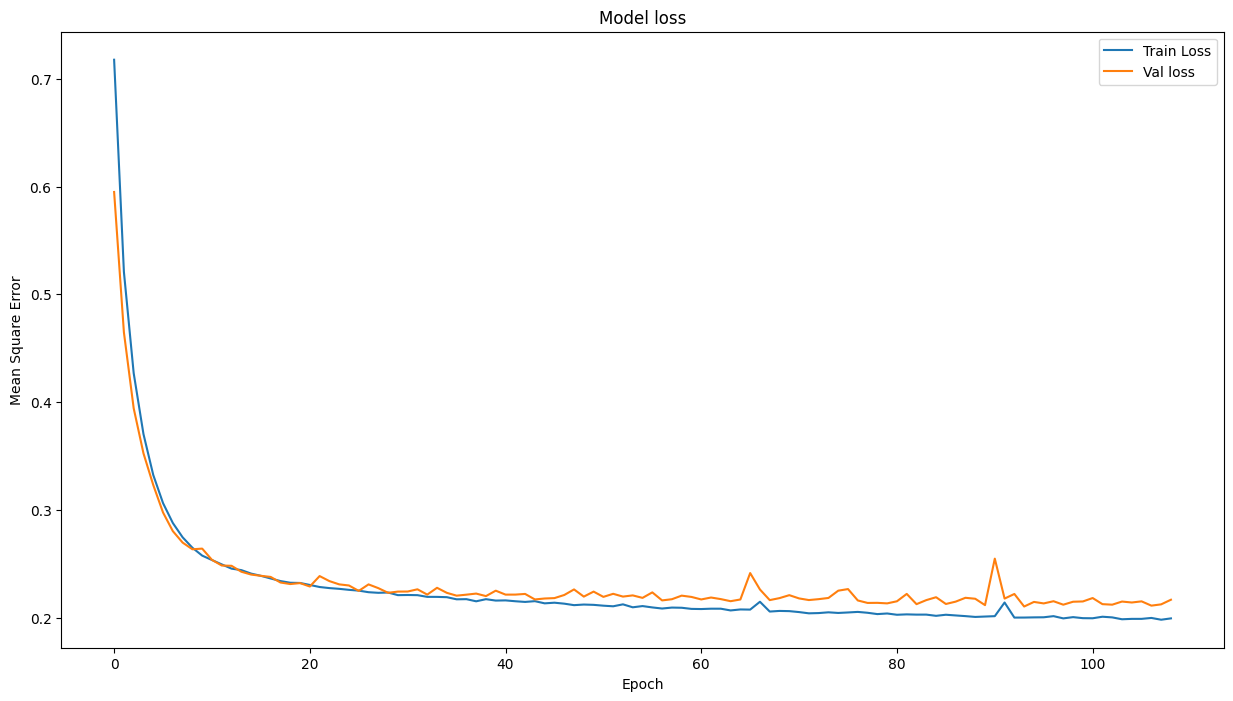

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model4.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 1s 1ms/step - loss: 0.1987 - mae: 0.3102
Mean square error:  0.19869203865528107
Root Mean square error:  0.44574885154678867
Mean absolute error:  0.3102140426635742


In [ ]:
#check the model performace in test dataset
score = model4.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 1ms/step - loss: 0.2192 - mae: 0.3198
Mean square error:  0.21922867000102997
Root Mean square error:  0.4682186134713463
Mean absolute error:  0.31976625323295593


model5

In [ ]:
#get number of columns in training data
n_cols = X_train.shape[1]

# builds model
model5 = Sequential()

model5.add(Dense(12, activation='relu',input_shape=(n_cols,)))
model5.add(Dense(12, activation='relu'))
model5.add(Dense(12, activation='relu'))
model5.add(Dense(12, activation='relu'))

model5.add(Dense(1,activation='linear'))

In [ ]:
#compile model
model5.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

In [ ]:
#inspect the model
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dense_19 (Dense)            (None, 12)                156       
                                                                 
 dense_20 (Dense)            (None, 12)                156       
                                                                 
 dense_21 (Dense)            (None, 12)                156       
                                                                 
 dense_22 (Dense)            (None, 1)                 13        
                                                                 
Total params: 637 (2.49 KB)
Trainable params: 637 (2.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#train model and perform validation test
import time
early_stop = EarlyStopping(monitor='val_loss', patience=15) # stops training when it doesn't show improvemnet.
t0 = time.time()
history = model5.fit(X_train, y_train, epochs=300,
          validation_data=(X_cv,y_cv), verbose=1, callbacks=[early_stop])
print("Training time:", time.time()-t0)

Epoch 1/300
446/446 [==============================] - 2s 2ms/step - loss: 0.5444 - mae: 0.5599 - val_loss: 0.3476 - val_mae: 0.4317
Epoch 2/300
446/446 [==============================] - 1s 2ms/step - loss: 0.3237 - mae: 0.4070 - val_loss: 0.3108 - val_mae: 0.4028
Epoch 3/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2968 - mae: 0.3876 - val_loss: 0.2923 - val_mae: 0.3920
Epoch 4/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2867 - mae: 0.3780 - val_loss: 0.2775 - val_mae: 0.3809
Epoch 5/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2728 - mae: 0.3690 - val_loss: 0.2772 - val_mae: 0.3712
Epoch 6/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2705 - mae: 0.3667 - val_loss: 0.2659 - val_mae: 0.3681
Epoch 7/300
446/446 [==============================] - 1s 2ms/step - loss: 0.2624 - mae: 0.3610 - val_loss: 0.2610 - val_mae: 0.3621
Epoch 8/300
446/446 [==============================] - 1s 2ms/step - 

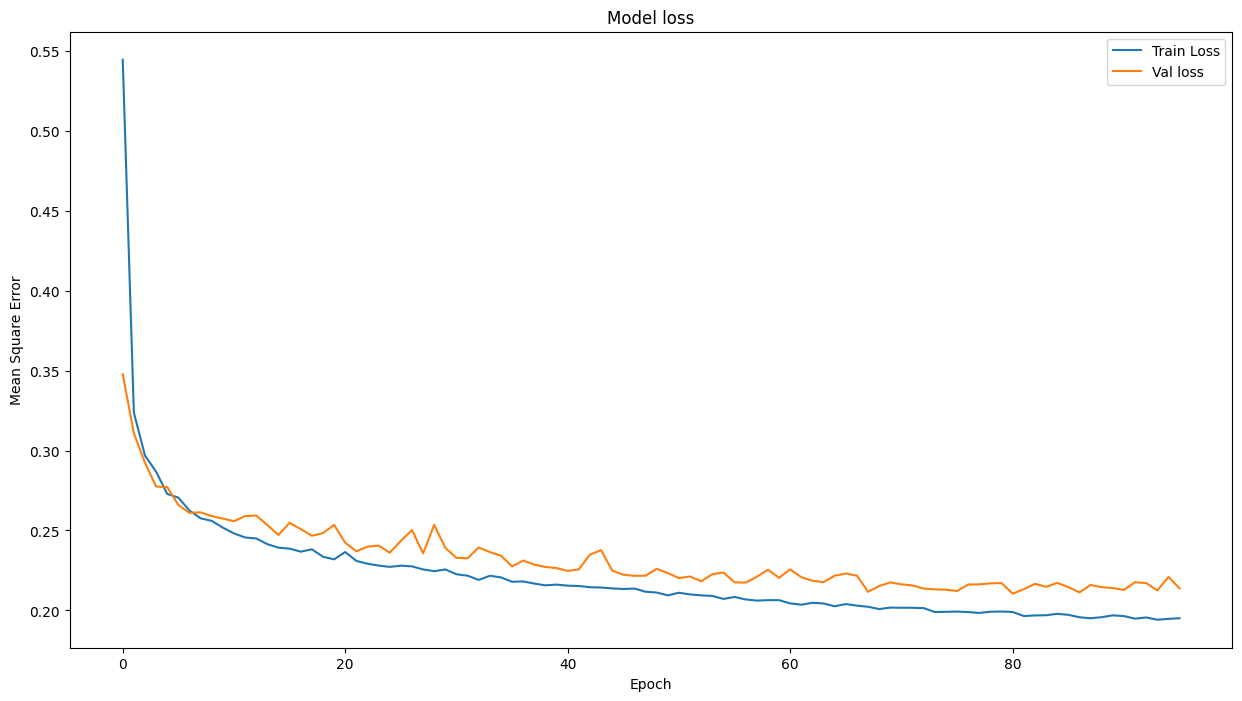

In [ ]:
# show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

In [ ]:
#check the model performace in test dataset
score = model5.evaluate(X_train, y_train, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

446/446 [==============================] - 1s 1ms/step - loss: 0.1921 - mae: 0.3055
Mean square error:  0.19206704199314117
Root Mean square error:  0.4382545401854283
Mean absolute error:  0.305485337972641


In [ ]:
#check the model performace in test dataset
score = model5.evaluate(X_test, y_test, verbose=1)

print('Mean square error: ', score[0])

print('Root Mean square error: ', np.sqrt(score[0]))
print('Mean absolute error: ', score[1])

96/96 [==============================] - 0s 1ms/step - loss: 0.2204 - mae: 0.3166
Mean square error:  0.2204161286354065
Root Mean square error:  0.46948496103220017
Mean absolute error:  0.316620409488678
